#### 1-1
정제
- 지역별로 데이터프레임 따로 만듦
- 판매량 '0' 삭제
- 년도 데이터 타입 변환 

####1-2
지역별 데이터프레임
- 터무니없이 높은 판매량(이상치)제거
- 9년과 같이 낮은 년도(이상치) 제거

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('vgames2.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
Year_null=df[df.Year.isnull()]
Year_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [ ]:
df.dropna(axis=0).reset_index(drop=True)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['Year']=df['Year'].fillna(0)
df.Year=df.Year.astype(int)


In [ ]:
df.drop_duplicates()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_JP=df.drop(['EU_Sales','NA_Sales','Other_Sales'],axis=1)
df_JP.JP_Sales=df_JP.JP_Sales.str.replace('[a-zA-Z]','',regex=True)
df_JP=df_JP[df_JP.JP_Sales!='0']
df_JP.JP_Sales=df_JP.JP_Sales.astype(float)
df_JP

,Name,Platform,Year,Genre,Publisher,JP_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.14
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.11
8,Imabikisou,PS3,2007,Adventure,Sega,0.04
14,Zoids Dash,DS,2006,Role-Playing,Tomy Corporation,0.02
...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.01
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.02
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.03
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.25


In [ ]:
#year 이상치 제거
q1=df_JP['Year'].quantile(0.25)
q3=df_JP['Year'].quantile(0.75)
iqr=q3-q1

jpout=df_JP['Year']<q1-1.5*iqr
df_JP[jpout]

c=df_JP[jpout].index;
df_JP.drop(c,inplace=True)
df_JP.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,JP_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
1,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.14
2,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.11
3,Imabikisou,PS3,2007,Adventure,Sega,0.04
4,Zoids Dash,DS,2006,Role-Playing,Tomy Corporation,0.02
...,...,...,...,...,...,...
5969,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.01
5970,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.02
5971,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.03
5972,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.25


In [ ]:
q1=df_JP['JP_Sales'].quantile(0.25)
q3=df_JP['JP_Sales'].quantile(0.75)
iqr=q3-q1

jpout=df_JP['JP_Sales']>q3+1.5*iqr
df_JP[jpout]

c=df_JP[jpout].index;
df_JP.drop(c,inplace=True)
df_JP.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,JP_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
1,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.14
2,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.11
3,Imabikisou,PS3,2007,Adventure,Sega,0.04
4,Zoids Dash,DS,2006,Role-Playing,Tomy Corporation,0.02
...,...,...,...,...,...,...
5324,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.01
5325,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.02
5326,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.03
5327,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.25


In [ ]:
df_JP.JP_Sales.sum()

508.75

In [ ]:
df_NA.NA_Sales.sum()

1864.15

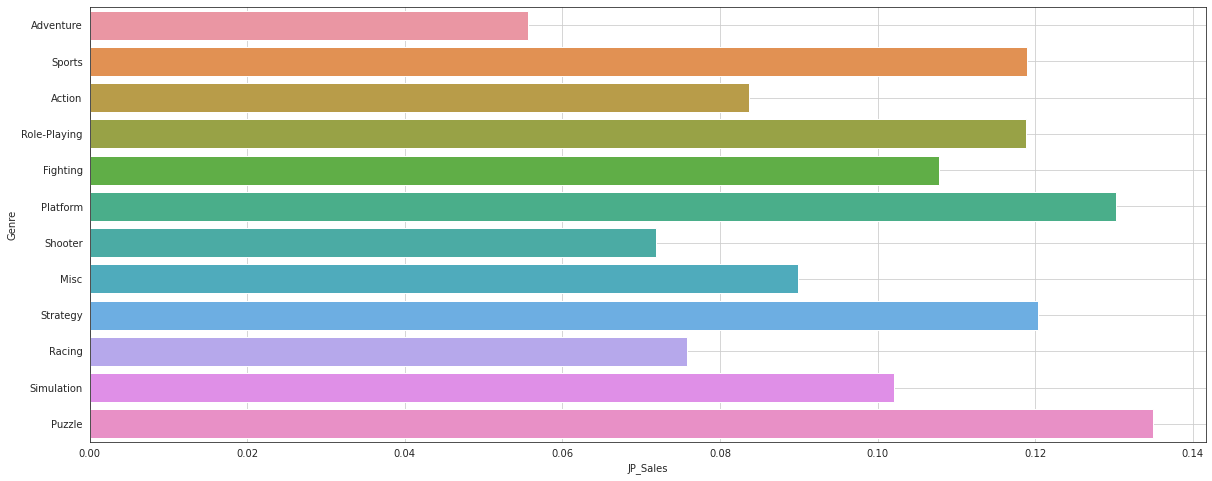

In [ ]:
plt.figure(figsize=(20,8));
sns.barplot(data=df_JP,x='JP_Sales',y='Genre',ci=None);
plt.grid(True)
# Puzzle - Platform  - Strategy - Role-playing - Sports

In [ ]:
#top5 장르별 판매량
df_JP_Platform=df_JP.query('Genre=="Platform"').JP_Sales.mean()
df_JP_Puzzle=df_JP.query('Genre=="Puzzle"').JP_Sales.mean()
df_JP_Sports=df_JP.query('Genre=="Sports"').JP_Sales.mean()
df_JP_Strategy=df_JP.query('Genre=="Strategy"').JP_Sales.mean()
df_JP_RolePlaying=df_JP.query('Genre=="Role-Playing"').JP_Sales.mean()
print(df_JP_Platform,df_JP_Puzzle,df_JP_Sports,df_JP_Strategy,df_JP_RolePlaying)

0.13030927835051548 0.13491228070175437 0.11896887159533075 0.12042553191489362 0.11884705882352943


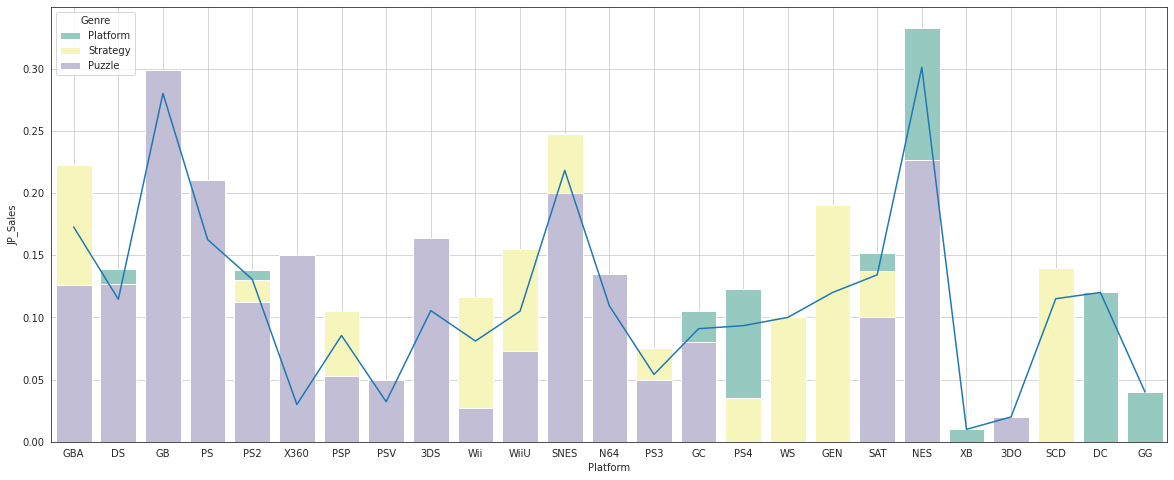

In [ ]:
plt.figure(figsize=(20,8));
df_JP_top=df_JP[(df_JP['Genre']=='Puzzle')|(df_JP['Genre']=='Platform')|(df_JP['Genre']=='Strategy')]
sns.lineplot(x='Platform',y='JP_Sales',data=df_JP_top,ci=None)
sns.barplot(palette='Set3',x='Platform',y='JP_Sales',data=df_JP_top,hue='Genre',ci=None,dodge=False);
plt.grid(True)

In [ ]:
df_EU=df.drop(['NA_Sales','JP_Sales','Other_Sales'],axis=1)
df_EU['EU_Sales']=df_EU.EU_Sales.str.replace('[a-zA-Z]','',regex=True)
df_EU=df_EU[df_EU.EU_Sales!='0']
df_EU.EU_Sales=df_EU.EU_Sales.astype(float)
df_EU.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.09
1,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.01
2,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.03
3,Ford Racing,PS,2001,Racing,Empire Interactive,0.33
4,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.05
...,...,...,...,...,...,...
10863,MindJack,PS3,2011,Shooter,Square Enix,0.08
10864,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.26
10865,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.04
10866,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.19


In [ ]:
#이상치 제거
q1=df_EU['EU_Sales'].quantile(0.25)
q3=df_EU['EU_Sales'].quantile(0.75)
iqr=q3-q1

euout=df_EU['EU_Sales']>q3+1.5*iqr
df_EU[euout]

b=df_EU[euout].index;
df_EU.drop(b,inplace=True)
df_EU.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.09
1,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.01
2,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.03
3,Ford Racing,PS,2001,Racing,Empire Interactive,0.33
4,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.05
...,...,...,...,...,...,...
9630,MindJack,PS3,2011,Shooter,Square Enix,0.08
9631,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.26
9632,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.04
9633,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.19


In [ ]:
#year 이상치 제거
q1=df_EU['Year'].quantile(0.25)
q3=df_EU['Year'].quantile(0.75)
iqr=q3-q1

euout=df_EU['Year']<q1-1.5*iqr
df_EU[euout]

c=df_EU[euout].index;
df_EU.drop(c,inplace=True)
df_EU.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.09
1,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.01
2,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.03
3,Ford Racing,PS,2001,Racing,Empire Interactive,0.33
4,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.05
...,...,...,...,...,...,...
9260,MindJack,PS3,2011,Shooter,Square Enix,0.08
9261,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,0.26
9262,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.04
9263,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.19


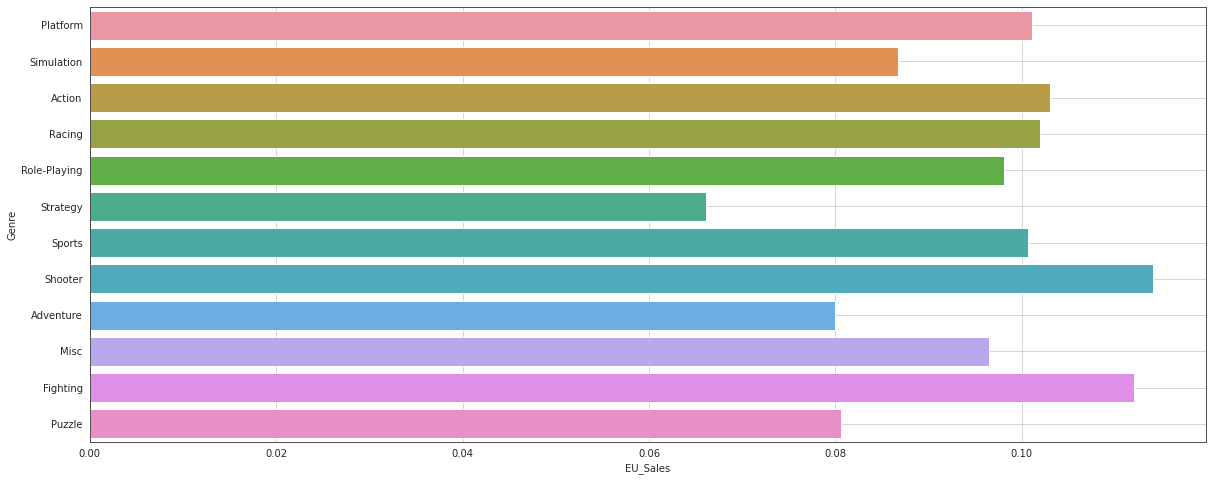

In [ ]:
plt.figure(figsize=(20,8));
sns.barplot(data=df_EU,x='EU_Sales',y='Genre',ci=None);
plt.grid(True)

In [ ]:
#top5 장르별 판매량
df_EU_Fighting=df_EU.query('Genre=="Fighting"').EU_Sales.mean()
df_EU_Shooter=df_EU.query('Genre=="Shooter"').EU_Sales.mean()
df_EU_Racing=df_EU.query('Genre=="Racing"').EU_Sales.mean()
df_EU_Action=df_EU.query('Genre=="Action"').EU_Sales.mean()
df_EU_Sport=df_EU.query('Genre=="Sports"').EU_Sales.mean()

print(df_EU_Fighting,df_EU_Shooter,df_EU_Racing,df_EU_Action,df_EU_Sport)

0.11201663201663203 0.11403055229142187 0.10193142857142858 0.10303736050460942 0.10063235294117648


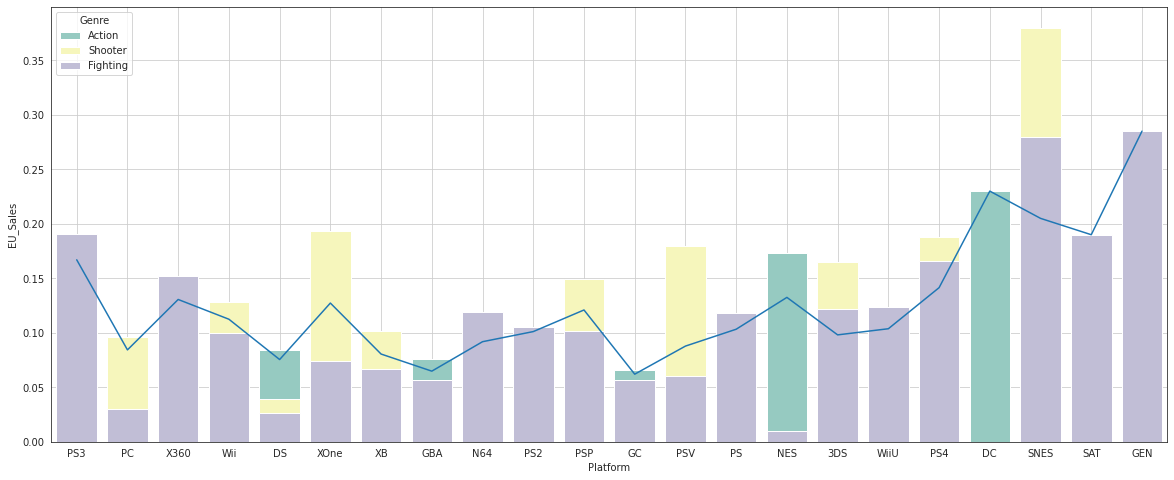

In [ ]:
plt.figure(figsize=(20,8));
df_EU_top=df_EU[(df_EU['Genre']=='Action')|(df_EU['Genre']=='Fighting')|(df_EU['Genre']=='Shooter')]
sns.lineplot(x='Platform',y='EU_Sales',data=df_EU_top,ci=None)
sns.barplot(palette='Set3',x='Platform',y='EU_Sales',data=df_EU_top,hue='Genre',ci=None,dodge=False);

plt.grid(True)

In [ ]:
df_NA=df.drop(['EU_Sales','JP_Sales','Other_Sales'],axis=1)
df_NA['NA_Sales']=df_NA.NA_Sales.str.replace('[a-zA-Z]','',regex=True)
df_NA=df_NA[df_NA.NA_Sales!='0']
df_NA.NA_Sales=df_NA.NA_Sales.astype(float)
df_NA.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02
...,...,...,...,...,...,...
12094,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18
12095,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15
12096,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01
12097,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44


In [ ]:
q1=df_NA['NA_Sales'].quantile(0.25)
q3=df_NA['NA_Sales'].quantile(0.75)
iqr=q3-q1

out=q3+1.5*iqr
out

0.7849999999999999

In [ ]:
#이상치 제거
naout=df_NA['NA_Sales']>q3+1.5*iqr
df_NA[naout]
a=df_NA[naout].index;
df_NA.drop(a,inplace=True)
df_NA.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02
...,...,...,...,...,...,...
10795,MindJack,PS3,2011,Shooter,Square Enix,0.07
10796,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15
10797,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01
10798,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44


In [ ]:
#year 이상치 제거
q1=df_NA['Year'].quantile(0.25)
q3=df_NA['Year'].quantile(0.75)
iqr=q3-q1

naout=df_NA['Year']<q1-1.5*iqr
df_NA[naout]

c=df_NA[naout].index;
df_NA.drop(c,inplace=True)
df_NA.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02
...,...,...,...,...,...,...
10390,MindJack,PS3,2011,Shooter,Square Enix,0.07
10391,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15
10392,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01
10393,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44


In [ ]:
df_NA.NA_Sales.sum()

1864.15

In [ ]:
df_NA.describe()

,Year,NA_Sales
count,10395.000000,10395.000000
mean,2006.560750,0.179331
std,4.692983,0.171261
min,1993.000000,0.010000
25%,2003.000000,0.060000
50%,2007.000000,0.120000
75%,2010.000000,0.250000
max,2020.000000,0.780000


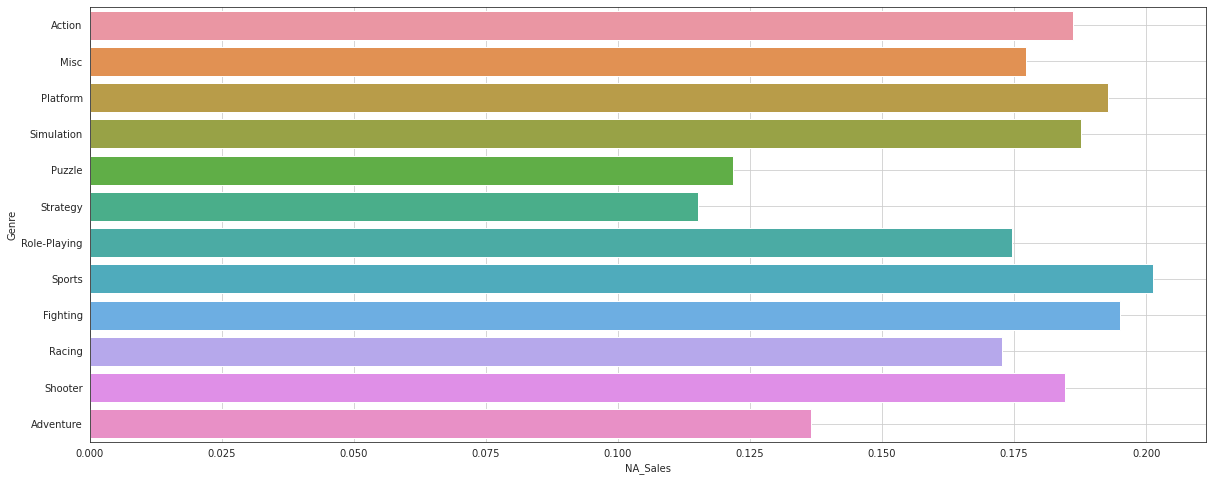

In [ ]:
plt.figure(figsize=(20,8));
sns.barplot(data=df_NA,x='NA_Sales',y='Genre',ci=None);
plt.grid(True)

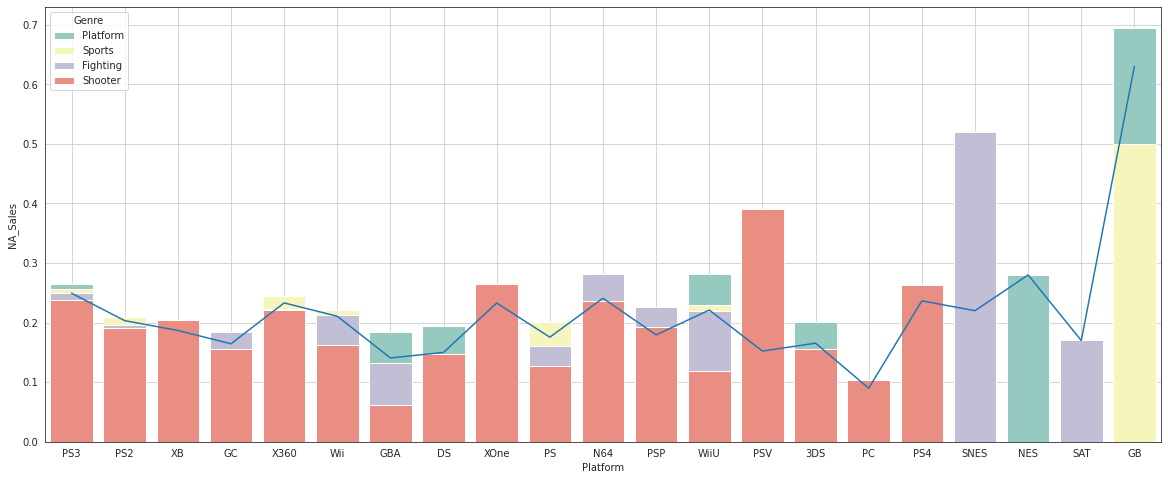

In [ ]:
plt.figure(figsize=(20,8));
df_NA_top=df_NA[(df_NA['Genre']=='Platform')|(df_NA['Genre']=='Fighting')|(df_NA['Genre']=='Sports')|(df_NA['Genre']=='Shooter')]
sns.lineplot(x='Platform',y='NA_Sales',data=df_NA_top,ci=None)
sns.barplot(palette='Set3',x='Platform',y='NA_Sales',data=df_NA_top,hue='Genre',ci=None,dodge=False);

plt.grid(True)

In [ ]:
#top5 장르별 판매량
df_NA_Sport=df_NA.query('Genre=="Sports"').NA_Sales.mean()
df_NA_Platform=df_NA.query('Genre=="Platform"').NA_Sales.mean()
df_NA_Fighting=df_NA.query('Genre=="Fighting"').NA_Sales.mean()
df_NA_Action=df_NA.query('Genre=="Action"').NA_Sales.mean()
df_NA_Simulation=df_NA.query('Genre=="Simulation"').NA_Sales.mean()
print(df_NA_Sport,df_NA_Platform,df_NA_Fighting,df_NA_Action,df_NA_Simulation)

0.20120050282840982 0.19267716535433072 0.1949498997995992 0.18611743286299498 0.18764378478664193


In [ ]:
df_NA.NA_Sales.sum()


1864.15

In [ ]:
df_JP.JP_Sales.sum()

508.75

In [ ]:
df_EU.EU_Sales.sum()

916.0500000000002

##지역별로 선호하는 장르
= 판매량으로 판단

장르에 따른 판매량 top5 시각화

In [ ]:
df_JP_3=df_JP[(df_JP['Genre']=='Puzzle')|(df_JP['Genre']=='Platform')|(df_JP['Genre']=='Strategy')]

In [ ]:
plt.figure(figsize=(20,8));
sns.lineplot(x='Year',y='total_sales',data=df,hue='Genre',ci=None);
plt.grid(True)
plt.xlim([1990,2016]);

ValueError: ignored

<Figure size 1440x576 with 0 Axes>

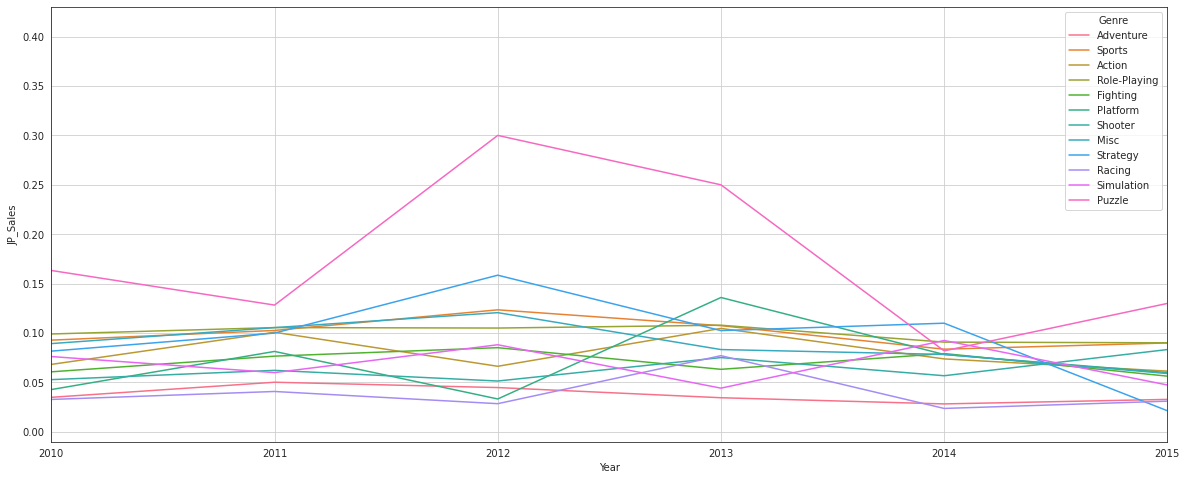

In [ ]:
plt.figure(figsize=(20,8));
sns.lineplot(x='Year',y='JP_Sales',data=df_JP,hue='Genre',ci=None)
plt.grid(True)
plt.xlim([2010,2015]);

#Puzzle 2013년부터 하락세이지만 여전히 강세
#최근 sport, role-playing 뜨는 중
#strategy 하락

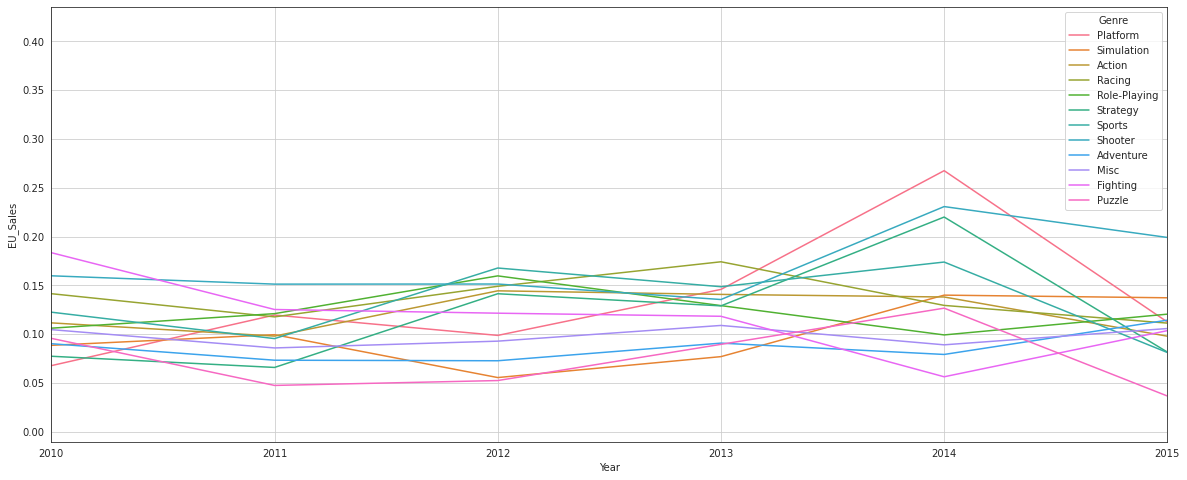

In [ ]:
#Shooter ,Fighting ,Action
#Shooter 여전히 강세,Fighting 하락세,Simulation 2012년부터 증가, Shooter말고는 비슷

plt.figure(figsize=(20,8));
sns.lineplot(x='Year',y='EU_Sales',data=df_EU,hue='Genre',ci=None)
plt.grid(True)
plt.xlim([2010,2015]);

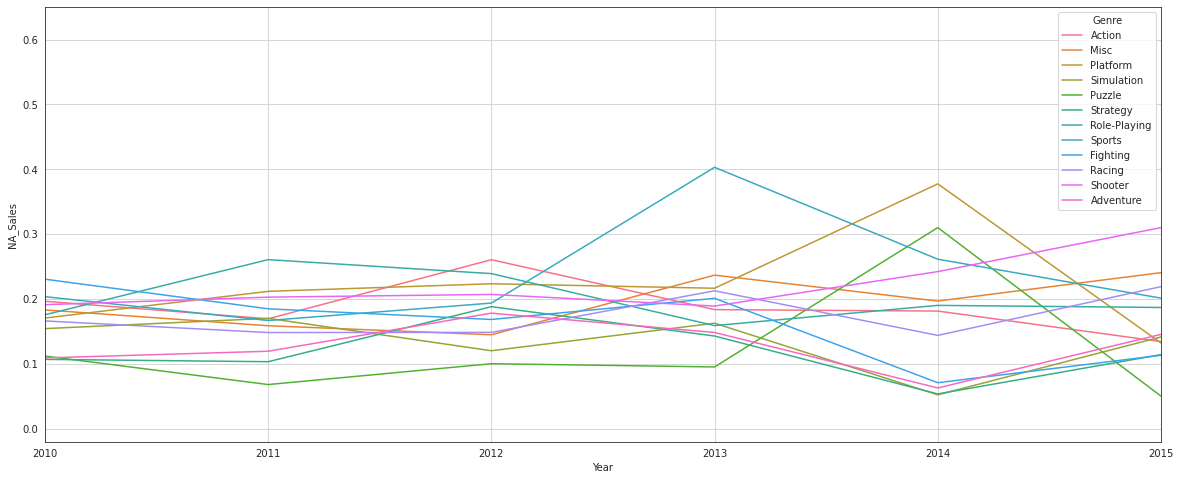

In [ ]:
#sport fighting platform
#2014년부터 전반적인 증가 Shooter 가장 증가, puzzle,platform 2014년부터 감소

plt.figure(figsize=(20,8));
sns.lineplot(x='Year',y='NA_Sales',data=df_NA,hue='Genre',ci=None)
plt.grid(True)
plt.xlim([2010,2015]);

In [ ]:
df['NA_Sales']=df_NA['NA_Sales']
df['EU_Sales']=df_EU['EU_Sales']
df['JP_Sales']=df_JP['JP_Sales']

df['Other_Sales']=df.Other_Sales.str.replace('[a-zA-Z]','',regex=True)
df.Other_Sales=df.Other_Sales.astype(float)
df=df.fillna(0)
df.reset_index(drop=True)

In [ ]:
q1=df['Other_Sales'].quantile(0.25)
q3=df['Other_Sales'].quantile(0.75)
iqr=q3-q1

oout=df['Other_Sales']>q3+1.5*iqr
df[oout]

c=df[oout].index;
df.drop(c,inplace=True)
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
14887,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00
14888,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
14889,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
14890,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#year 이상치 제거
q1=df['Year'].quantile(0.25)
q3=df['Year'].quantile(0.75)
iqr=q3-q1

jpout=df['Year']<q1-1.5*iqr
df[jpout]

c=df[jpout].index;
df.drop(c,inplace=True)
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
14265,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00
14266,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
14267,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
14268,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.Other_Sales.sum()

236.19

In [ ]:
df_NA.groupby('Genre').agg(np.mean)

,Year,NA_Sales
Genre,,
Action,2007.834320,0.186117
Adventure,2007.202335,0.136615
Fighting,2005.418838,0.194950
Misc,2007.364839,0.177287
Platform,2005.251969,0.192677
Puzzle,2006.274611,0.121710
Racing,2005.024768,0.172755
Role-Playing,2007.288204,0.174531
Shooter,2006.499455,0.184678


In [ ]:
na2012=df_NA.groupby('Year').get_group(2012)
na2012.groupby('Genre').get_group('Misc').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year        2012.000000
NA_Sales       0.144667
dtype: float64

In [ ]:
df['total_sales']=df[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df=df.drop(index=df[df['Genre']==0].index)
df=df.drop(index=df[df['Year']==0].index)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,14230.000000,14230.000000,14230.000000,14230.000000,14230.000000,14230.000000
mean,2006.657414,0.106800,0.051472,0.030595,0.016547,0.205413
std,5.202464,0.144877,0.082587,0.070451,0.023076,0.219265
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2007.000000,0.050000,0.020000,0.000000,0.010000,0.130000
75%,2010.000000,0.150000,0.060000,0.020000,0.020000,0.290000
max,2020.000000,0.780000,0.470000,0.430000,0.100000,1.500000


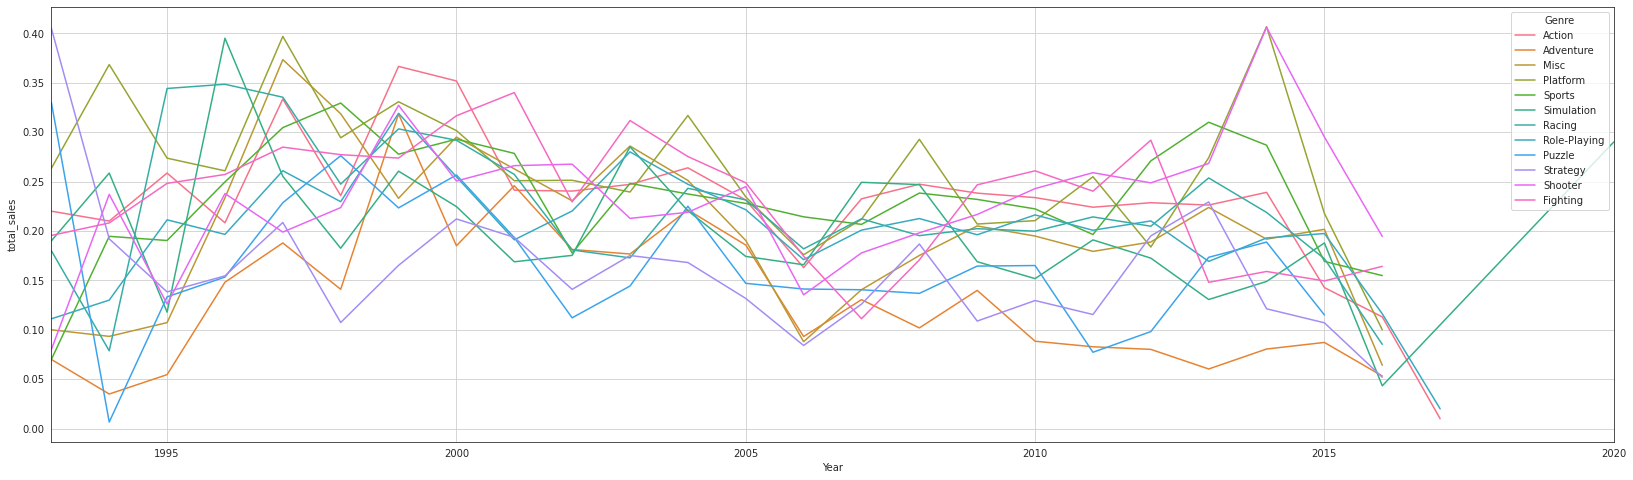

In [ ]:
#연도별 게임 장르 트렌드
plt.figure(figsize=(28,8));
sns.lineplot(x='Year',y='total_sales',data=df,hue='Genre',ci=None)
plt.xlim([1993,2020]);
#plt.legend(loc='upper right')
#sns.heatmap(df.corr())
sns.set_style("white")
plt.grid(True)
#plt.plot(df.Year,df.total_sales)

#2014년이후 전반적인 하락세, 특히 platform,shooter 급격히 감소,sport shooter fighting 상위권

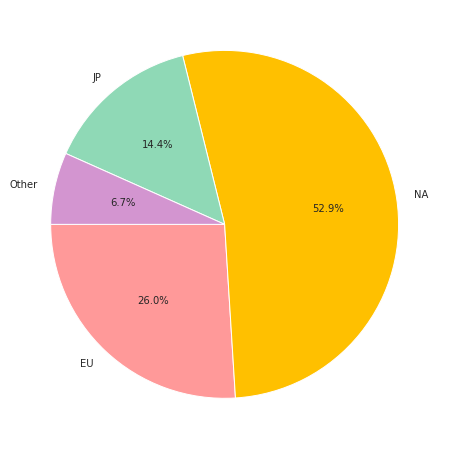

In [ ]:
labels=['EU','NA','JP','Other']
bin=['916.05','1864.15','508.75','235.46']
plt.figure(figsize=(20,8));
plt.pie(bin,labels=labels,autopct='%.1f%%', startangle=180,colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'])
plt.show()

In [ ]:
df_year=df[df['Year']>2011]

In [ ]:
a=df_NA.query('Genre=="Shooter"').Platform.shape[0]

In [ ]:
b=df.query('Genre=="Shooter"').Platform.shape[0]

In [ ]:
b=dfp.query('Genre=="Shooter"').Platform.sum()

AttributeError: ignored

In [ ]:
pdf=pd.pivot_table(df_NA,index='Genre',columns='Platform',values='NA_Sales',aggfunc='mean',fill_value=0)
dfp=pd.DataFrame(pdf)
dfp

Platform,3DS,DC,DS,GB,GBA,GC,N64,NES,PC,PS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.161067,0.41,0.177920,0.000,0.170417,0.183333,0.265000,0.25,0.086375,0.167652,...,0.155200,0.152342,0.094318,0.00,0.333333,0.215405,0.159821,0.237043,0.146143,0.168214
Adventure,0.072857,0.52,0.150000,0.000,0.231000,0.150526,0.076667,0.00,0.022000,0.143636,...,0.109231,0.120000,0.065385,0.00,0.000000,0.149091,0.045000,0.144000,0.085385,0.133333
Fighting,0.148750,0.00,0.135789,0.000,0.131818,0.184062,0.281905,0.00,0.010000,0.160139,...,0.175455,0.225526,0.086000,0.17,0.520000,0.212333,0.220000,0.223125,0.192093,0.096667
Misc,0.128000,0.00,0.154414,0.695,0.175096,0.158571,0.222727,0.00,0.071429,0.210392,...,0.207143,0.134103,0.113333,0.00,0.000000,0.225410,0.226154,0.204536,0.123256,0.231538
Platform,0.201739,0.00,0.194795,0.695,0.183458,0.179077,0.223636,0.28,0.016667,0.193200,...,0.198182,0.124483,0.131429,0.00,0.196000,0.220476,0.280909,0.235455,0.128750,0.110000
Puzzle,0.107500,0.00,0.126742,0.290,0.123226,0.076667,0.200909,0.62,0.012857,0.113929,...,0.000000,0.083939,0.080000,0.00,0.000000,0.132222,0.330000,0.090000,0.045714,0.000000
Racing,0.137778,0.00,0.145484,0.000,0.123333,0.167414,0.226042,0.00,0.046250,0.194909,...,0.176429,0.190536,0.128571,0.21,0.000000,0.170854,0.170000,0.204444,0.137130,0.175385
Role-Playing,0.218889,0.00,0.191386,0.000,0.145238,0.226522,0.223333,0.00,0.112619,0.152881,...,0.185769,0.128889,0.100357,0.00,0.396667,0.197600,0.215000,0.233462,0.174444,0.259167
Shooter,0.155000,0.00,0.147368,0.000,0.061842,0.156087,0.235789,0.00,0.102917,0.128025,...,0.263333,0.193448,0.390000,0.00,0.000000,0.161731,0.118571,0.221120,0.203604,0.265000


In [ ]:
dfp.Shooter.sum()

AttributeError: ignored

In [ ]:
s=df.query('Genre=="Shooter"').NA_Sales.mean()
#ds=df_NA.query('Genre=="Shooter"').NA_Sales.sum()
s

0.12291417165668664

In [ ]:
import statsmodels.api as sm

In [ ]:
z_score, p_value=sm.stats.proportions_ztest([s,ds],[b,a],alternative='smaller')

In [ ]:
z_score, p_value

(-3.7600729132950796, 8.49319204485185e-05)

In [ ]:
import random
np.random.seed(10)

null_means ,df_means,diff_means=[],[],[]

for _ in range(10000):
  
 
  df_mean =df[df.Genre == 'Shooter'].NA_Sales.mean()
  df_means.append(df_mean)
  null_mean=df_NA[df_NA.Genre == 'Shooter'].NA_Sales.mean()
  null_means.append(null_mean)

  diff_means.append(df_mean-null_mean)

In [ ]:
np.random.seed(10)

null_means = []

for _ in range(10000):
  sample = df_NA[df_NA.Genre == 'Shooter'].sample(150, replace=True)
  null_means.append(sample.NA_Sales.mean())

In [ ]:
sample_diff = df_NA[df_NA.Genre== 'Shooter'].NA_Sales.mean()-df[df.Genre== 'Shooter'].NA_Sales.mean()
print(sample_diff)

0.0617641271437496


In [ ]:
sample_mean = df_NA[df_NA.Genre == 'Shooter'].NA_Sales.mean()
print(sample_mean)

0.18467829880043624


In [ ]:
sample_std=np.std(null_means)
sample_std

0.01455799568941946

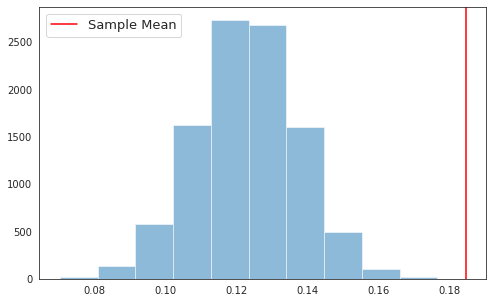

In [ ]:
np.random.seed(10)
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0.123, sample_std, 10000) 
plt.hist(null_vals, alpha=0.5)
plt.axvline(sample_mean, color='r', label='Sample Mean')
plt.legend(fontsize=13);

In [ ]:
(null_vals>sample_mean).mean()

0.0